In [17]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje supervisado usado para clasificación y regresión. Su principio es simple: predice un valor o categoría basado en los K vecinos más cercanos en el espacio de características.


1- Se elige un número  K de vecinos (hiperparámetro).

2- Para una nueva observación, se calculan las distancias con todos los datos de entrenamiento.

3- Se seleccionan los  K vecinos más cercanos. 

4- Se predice el promedio de los valores de los K vecinos.


## Para determinar los vecinos más cercanos

### Definición General
La distancia euclidiana entre dos puntos \( A \) y \( B \) en un espacio \( n \)-dimensional se define como:

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i^A - x_i^B)^2}
$$

#### Casos Específicos

### Caso en Dos Dimensiones
En un espacio bidimensional (\( n = 2 \)):

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

### Caso en Tres Dimensiones
En un espacio tridimensional (\( n = 3 \)):

$$
d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
$$

**Ejemplo Numérico:**
Si tenemos los puntos \( A(1,2,3) \) y \( B(4,6,8) \), la distancia euclidiana es:

$$
d(A, B) = \sqrt{(4 - 1)^2 + (6 - 2)^2 + (8 - 3)^2} = \sqrt{9 + 16 + 25} = \sqrt{50} \approx 7.07
$$



In [23]:
### Ejemplo distancie uclidiana

In [3]:
df = pd.read_csv('housing.csv')
df = pd.get_dummies(df)
df['total_bedrooms'] = df['total_bedrooms'].fillna(df.total_bedrooms.mean())

In [20]:
### Crea el modelo KNN y realiza cross validation 

In [14]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normalizar las características (KNN es sensible a escalas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=5).fit(X_train_scaled, y_train)
predicciones = model.predict(X_test_scaled)

r2_score(y_pred=predicciones, y_true=y_test)


0.7091365059773751

In [24]:
nn = []
r2 = []
r2_train = []
for i in range(1,60):
    model = KNeighborsRegressor(n_neighbors=i).fit(X_train_scaled, y_train)
    predicciones = model.predict(X_test_scaled)
    r2.append(r2_score(y_pred=predicciones, y_true=y_test))
    nn.append(i)
    predicciones_train = model.predict(X_train_scaled)
    r2_train.append(r2_score(y_pred=predicciones_train, y_true=y_train))

In [22]:
r2

[0.5667077332621469,
 0.6606855797281009,
 0.6864309164454395,
 0.7010527738890389,
 0.7091365059773751,
 0.7125327123001688,
 0.7156054611911804,
 0.7170916199361073,
 0.7184498871758564,
 0.7199365884909582,
 0.7206581152885447,
 0.7209589636134216,
 0.7207538922548814,
 0.7227809597448813,
 0.7220302364744879,
 0.7201794585317394,
 0.7190814449058527,
 0.7184416614511673,
 0.7183386858743921,
 0.7176532799828719,
 0.7169690921294608,
 0.7164675733960086,
 0.7162963701886905,
 0.715542403482323,
 0.7146954882761839,
 0.7139042597339349,
 0.7134636407647421,
 0.7136071932669108,
 0.7127153391650016,
 0.7121407634353798,
 0.7114761525403845,
 0.711299185211004,
 0.7105097159403526,
 0.7099209551405845,
 0.7090161196113928,
 0.7084662148409349,
 0.7071096251005465,
 0.7065770680783021,
 0.7057817408294316,
 0.7051791372777472,
 0.7042528914991104,
 0.7032855543305657,
 0.7026959174428482,
 0.7016414993536674,
 0.700477876782517,
 0.6997771295759805,
 0.6991841593624555,
 0.6985074799571

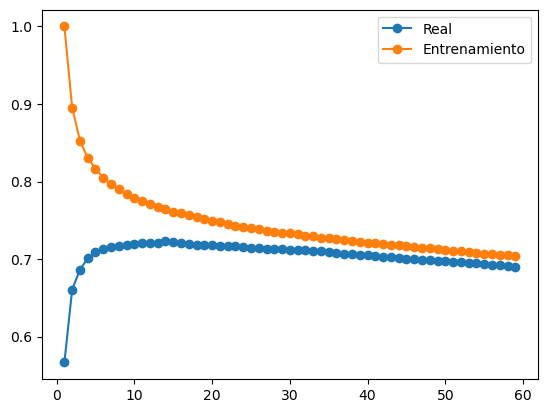

In [28]:
## Grafica los resultados
resultados = pd.DataFrame({
    'nn': nn,
    'r2': r2,
    'r2_train': r2_train
})

plt.plot(resultados.nn, resultados.r2, marker = 'o', label = "Real")
plt.plot(resultados.nn, resultados.r2_train, marker = 'o', label = "Entrenamiento")
plt.legend()